In [1]:
import datablocks
from datablocks import DB, signature
import micron, micron.midatasets, micron.mimodels

In [2]:
GPU='0,2,3'



VOCAB_LEN = 100
VOCABSET_CLASS = "MiRNA"
VOCABSET_SCOPE = {}
VOCABSET_ALIAS = 'mirna'

GRCH38_MAX_SEQS = 3
MODELSET_CLASS = "GRCh38"
MODELSET_SCOPE = {'max_seqs': GRCH38_MAX_SEQS}
MODELSET_ALIAS = f'grch38_{GRCH38_MAX_SEQS}'
MODEL = "GPT2S1"
N_CTX = 30
N_EMBD = 128 # 768
N_HEAD = 4  # 12
N_LAYER = 6 # 12
N_POSITIONS = 128 # 1024
TRAIN_MAX_SAMPLES = int(2e+6)
TEST_MAX_SAMPLES = int(TRAIN_MAX_SAMPLES/10)
EPOCHS = 16

# DATASETS

### VOCABSET

In [24]:
# DEBUG: rebuild=True
vocabsetdb = DB(f'micron.midatasets.{VOCABSET_CLASS}', VOCABSET_ALIAS, verbose=True, datablock={'rebuild': True})
vocabsetdb

datablocks.datablock.DB('micron.midatasets.MiRNA', 'mirna', use_native_storage=False, verbose=True, datablock={'rebuild': True})

In [4]:
#%%debug
vocabsetdb.build(**VOCABSET_SCOPE)

100%|██████████| 1/1 [00:04<00:00,  4.30s/it]


Parsing local copy /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/tmpy86dvjf486b2qlgb/train_fraction=0.9/miRNA.dat.gz
Built dataframe
Built train dataset from dataframe with train_fraction 0.9
Built test dataset from dataframe with train_fraction 0.9
Wrote train dataset to /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/tmpy86dvjf486b2qlgb/train_fraction=0.9/miRNA.train.parquet
Wrote test dataset to /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/tmpy86dvjf486b2qlgb/train_fraction=0.9/miRNA.test.parquet
task_id: 5473428391403369029


{None: {(('train_fraction',
    0.9),): '/home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/train_fraction=0.9'}}

In [6]:
vocabsetdb.records()

,alias,stage,version,scope,date,timestamp,runtime_secs,task_id,status,metric
39,mirna,DONE,'0.0.1',{'train_fraction': 0.9},2023-04-16.15.58.24.1681682304,1681660704676614,5.419761,5473428391403369029,STATUS.SUCCEEDED,"(1725, 192)"
37,mirna,BEGIN,'0.0.1',{'train_fraction': 0.9},2023-04-16.16.00.47.1681682447,1681660848332372,,0,,
61,mirna,END,'0.0.1',{'train_fraction': 0.9},2023-04-16.16.00.53.1681682453,1681660853340446,5.504803,5473428391403369029,STATUS.SUCCEEDED,"(1725, 192)"
38,mirna,BEGIN,'0.0.1',{'train_fraction': 0.9},2023-04-16.16.01.44.1681682504,1681660905143076,,0,,
62,mirna,END,'0.0.1',{'train_fraction': 0.9},2023-04-16.16.01.49.1681682509,1681660910158148,5.008274,5473428391403369029,STATUS.SUCCEEDED,"(1725, 192)"


In [9]:
g = vocabsetdb.record_summary_graph()

In [11]:
print(g)

request: datablocks.datablock.Datablock.collate_databooks({...
result:  {None: {(('train_fraction', 0.9),): '/home/dkarpey...
[0]: {None: {(('train_fraction', 0.9),): '/home/dkarpey...
[1]:
	request: datablocks.datablock.Datablock.collate_databooks(d...
	result:  {None: {(('train_fraction', 0.9),): '/home/dkarpey...
	[0]:
		request: datablock.micron.midatasets.MiRNA(None, {}, datasp...
		result:  {None: {(('train_fraction', 0.9),): '/home/dkarpey...
		[0]: {'train_fraction': 0.9}
		[train_fraction]: 0.9


In [21]:
print(g.node(1, 0))
g.node(1, 0).logpath()

request: datablock.micron.midatasets.MiRNA(None, {}, datasp...
result:  {None: {(('train_fraction', 0.9),): '/home/dkarpey...
[0]: {'train_fraction': 0.9}
[train_fraction]: 0.9


'/home/dkarpeyev/.cache/datalake/datablocks/eval/pool/Logging/Logging/task-2023-04-16-1681660904577796-000000000000000000000008263554761098880413.log'

In [23]:
!ls -la /home/dkarpeyev/.cache/datalake/datablocks/eval/pool/Logging/Logging/task-2023-04-16-1681660904577796-000000000000000000000008263554761098880413.log

-rw-rw-r-- 1 dkarpeyev pearson_lab 0 Apr 16 16:01 /home/dkarpeyev/.cache/datalake/datablocks/eval/pool/Logging/Logging/task-2023-04-16-1681660904577796-000000000000000000000008263554761098880413.log


In [5]:
vocabsetdb.extent()

{None: ({'train_fraction': 0.9},
  '/home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/train_fraction=0.9')}

In [6]:
vocabsetdb.list()

{None: ({'train_fraction': 0.9},
  '/home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/MiRNA/0.0.1/train_fraction=0.9')}

In [7]:
vocabsetdb.record_logpath()

'/home/dkarpeyev/.cache/datalake/datablocks/eval/pool/Logging/Logging/task-2023-04-15-1681597130162095-000000000000000000000005473428391403369029.log'

In [11]:
vocabsetdb.record_log()

''

In [7]:
vocabsetdb.topics

[None]

In [ ]:
vocabdb

In [8]:
vocabsetdb_records = vocabsetdb.records(full=True)

In [9]:
vocabsetdb_records.columns

Index(['alias', 'stage', 'classname', 'version', 'scope', 'date', 'timestamp',
       'runtime_secs', 'task_id', 'status', 'success', 'metric', 'logspace',
       'logname', 'report_summary', 'topic', 'shardscope'],
      dtype='object')

In [11]:
vocabsetdb_records

,alias,stage,classname,version,scope,date,timestamp,runtime_secs,task_id,status,success,metric,logspace,logname,report_summary,topic,shardscope
2,mirna,BEGIN,datablock.micron.midatasets.MiRNA,'0.0.1',{'train_fraction': 0.9},2023-04-15.09.15.31.1681571731,1681550131685202,,0,,,,,,,None,{'train_fraction': 0.9}
7,mirna,END,datablock.micron.midatasets.MiRNA,'0.0.1',{'train_fraction': 0.9},2023-04-15.09.15.36.1681571736,1681550137892184,0.0,5473428391403369029,STATUS.SUCCEEDED,true,"(1725, 192)",datablocks.dataspace.Dataspace('/home/dkarpeye...,task-2023-04-15-1681550131341854-0000000000000...,"{'id': 'id:5473428391403369029', 'completed': ...",None,{'train_fraction': 0.9}
3,mirna,BEGIN,datablock.micron.midatasets.MiRNA,'0.0.1',{'train_fraction': 0.9},2023-04-15.09.15.46.1681571746,1681550146296902,,0,,,,,,,None,{'train_fraction': 0.9}
4,mirna,BEGIN,datablock.micron.midatasets.MiRNA,'0.0.1',{'train_fraction': 0.9},2023-04-15.09.43.32.1681573412,1681551812791704,,0,,,,,,,None,{'train_fraction': 0.9}
8,mirna,END,datablock.micron.midatasets.MiRNA,'0.0.1',{'train_fraction': 0.9},2023-04-15.09.43.36.1681573416,1681551817210594,0.0,5473428391403369029,STATUS.SUCCEEDED,true,"(1725, 192)",datablocks.dataspace.Dataspace('/home/dkarpeye...,task-2023-04-15-1681551812395060-0000000000000...,"{'id': 'id:5473428391403369029', 'completed': ...",None,{'train_fraction': 0.9}


In [9]:
vocabsetdb.read()

DatasetDict({
    train: Dataset({
        features: ['ID', 'Accession', 'sequence'],
        num_rows: 1725
    })
    test: Dataset({
        features: ['ID', 'Accession', 'sequence'],
        num_rows: 192
    })
})

### MODELSET

In [16]:
modelsetdb = DB(f'micron.midatasets.{MODELSET_CLASS}', MODELSET_ALIAS, verbose=True)

In [17]:
modelsetdb

datablocks.datablock.DB('micron.midatasets.GRCh38', 'grch38_3', use_native_storage=False, verbose=True, datablock={'rebuild': True})

In [18]:
modelsetdb.build(**MODELSET_SCOPE)

100%|██████████| 1/1 [00:34<00:00, 34.60s/it]


Parsing local copy /home/dkarpeyev/.cache/datalake/datablock/micron/midatasets/GRCh38/0.0.1/tmpxf5kfogc_fi21x_9/max_seqs=3/min_subseq_len=10/max_subseq_len=30/train_fraction=0.9/GRCh38_latest_genomic.fna.gz


KeyboardInterrupt: 

In [15]:
modelsetdb.records(full=True)

,alias,stage,classname,version,scope,date,timestamp,runtime_secs,task_id,status,success,metric,logspace,logname,report_summary,topic,shardscope
0,grch38_3,BEGIN,datablock.micron.midatasets.GRCh38,'0.0.1',"{'max_seqs': 3, 'min_subseq_len': 10, 'max_sub...",2023-04-15.08.34.36.1681569276,1681547676729846,,0,,,,,,,None,"{'max_seqs': 3, 'min_subseq_len': 10, 'max_sub..."
1,grch38_3,END,datablock.micron.midatasets.GRCh38,'0.0.1',"{'max_seqs': 3, 'min_subseq_len': 10, 'max_sub...",2023-04-15.08.34.36.1681569276,1681547676739998,0.0,2503660424484653315,STATUS.SUCCEEDED,true,"(50694511, 5632724)",datablocks.dataspace.Dataspace('/home/dkarpeye...,task-2023-04-15-1681547676364167-0000000000000...,"{'id': 'id:2503660424484653315', 'completed': ...",None,"{'max_seqs': 3, 'min_subseq_len': 10, 'max_sub..."


In [11]:
modelsetdb.extent()

ValueError: datablocks.datablock.DB('micron.midatasets.GRCh38', 'grch38_3', use_native_storage=False, verbose=True) of version 0.0.1 has not been built yet

In [ ]:
modelsetdb.records()

# TOKENIZER

In [ ]:
tkdb = DB('micron.midatasets.Tokenizer', f'{VOCABSET_ALIAS}.{VOCAB_LEN}')

In [ ]:
tkdb.build(datasets=vocabsetdb.reader(), tokenizer_trainer_vocab_size=VOCAB_LEN)

In [ ]:
tkdb.extent()

In [ ]:
tkdb.records()

# TOKENIZED DATASETS

In [ ]:
tkmodelsetdb = DB('micron.midatasets.TokenizedDatasets', f'{MODELSET_ALIAS}.{VOCABSET_ALIAS}.{VOCAB_LEN}', verbose=True)

In [ ]:
tkmodelsetdb.extent()

In [ ]:
tkmodelsetdb.records()

# MODEL

In [ ]:
import logging
logging.basicConfig(level='DEBUG')

In [ ]:
modeldb = DB('micron.mimodels.GPT2', f'{MODEL}.{MODELSET_ALIAS}.{VOCABSET_ALIAS}.{VOCAB_LEN}.{EPOCHS}', gpu=GPU, verbose=True, datablock=dict(verbose=True))

In [ ]:
modeldb

In [ ]:
_model = modeldb.impl.model(tokenizer=tkdb.read(), 
                              n_ctx=N_CTX,
                              n_embd=N_EMBD,
                              n_layer=N_LAYER,
                              n_head=N_HEAD,
                              n_positions=N_POSITIONS,
                           )

In [ ]:
_model.num_parameters()

In [ ]:
modeldb.impl.build?

In [ ]:
modeldb.intent(tokenized_datasets=tkmodelsetdb.reader(), 
              tokenizer=tkdb.reader(), 
              n_ctx=N_CTX,
              n_embd=N_EMBD,
              n_head=N_HEAD,
              n_positions=N_POSITIONS,
              num_epochs=EPOCHS,
              train_max_samples=TRAIN_MAX_SAMPLES,
              test_max_samples=TEST_MAX_SAMPLES,
             )

In [ ]:
modeldb.extent()

In [ ]:
modeldb

In [ ]:
# UNATTENDED bash equivalent: guards against disconnections
print(f'''export MODELDB="{modeldb}"''')
print(f'''nohup datablocks.exec "$MODELDB.build(\
tokenized_datasets={tkmodelsetdb}.reader(), \
tokenizer={tkdb}.reader(), \
n_ctx={N_CTX}, \
n_embd={N_EMBD}, \
n_head={N_HEAD}, \
n_positions={N_POSITIONS}, \
train_max_samples={TRAIN_MAX_SAMPLES},\
test_max_samples={TEST_MAX_SAMPLES}, \
num_epochs={EPOCHS})" \
2>&1 > GPT2.{MODEL}.{MODELSET_ALIAS}.{VOCABSET_ALIAS}.v{VOCAB_LEN}.e{EPOCHS}.log &
''')

In [29]:
modeldb

datablocks.datablock.DB('micron.mimodels.GPT2', 'GPT2S1.grch38.3.mirna.100.16', use_native_storage=False, gpu='0,2,3', verbose=True, datablock={'verbose': True})

In [31]:
losses = modeldb.read('stats')

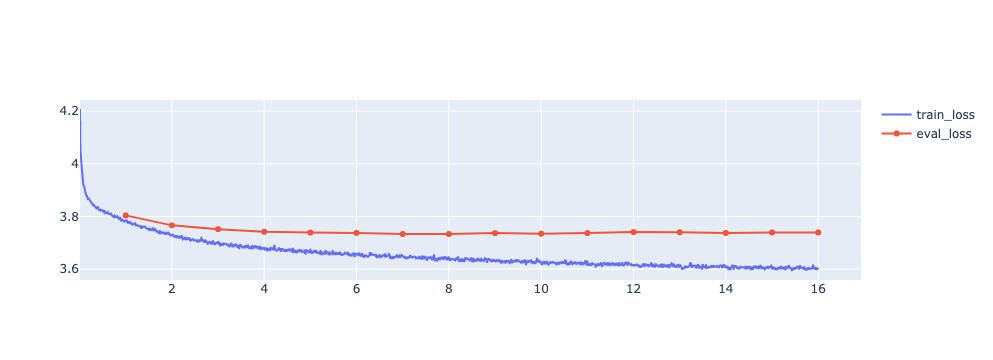

In [33]:
fig = micron.mimodels.GPT2.plot_losses(*losses).show()

# LATENT SPACE

From `transformers.generation.utils.GenerationMixin.compute_transition_scores()` docstring:


"""

...

Examples:

        ```python
        >>> from transformers import GPT2Tokenizer, AutoModelForCausalLM
        >>> import numpy as np

        >>> tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        >>> model = AutoModelForCausalLM.from_pretrained("gpt2")
        >>> tokenizer.pad_token_id = tokenizer.eos_token_id
        >>> inputs = tokenizer(["Today is"], return_tensors="pt")

        >>> # Example 1: Print the scores for each token generated with Greedy Search
        >>> outputs = model.generate(**inputs, max_new_tokens=5, return_dict_in_generate=True, output_scores=True)
        >>> transition_scores = model.compute_transition_scores(
        ...     outputs.sequences, outputs.scores, normalize_logits=True
        ... )
        >>> input_length = inputs.input_ids.shape[1]
        >>> generated_tokens = outputs.sequences[:, input_length:]
        >>> for tok, score in zip(generated_tokens[0], transition_scores[0]):
        ...     # | token | token string | logits | probability
        ...     print(f"| {tok:5d} | {tokenizer.decode(tok):8s} | {score.numpy():.3f} | {np.exp(score.numpy()):.2%}")
        |   262 |  the     | -1.414 | 24.33%
        |  1110 |  day     | -2.609 | 7.36%
        |   618 |  when    | -2.010 | 13.40%
        |   356 |  we      | -1.859 | 15.58%
        |   460 |  can     | -2.508 | 8.14%

        >>> # Example 2: Reconstruct the sequence scores from Beam Search
        >>> outputs = model.generate(
        ...     **inputs,
        ...     max_new_tokens=5,
        ...     num_beams=4,
        ...     num_return_sequences=4,
        ...     return_dict_in_generate=True,
        ...     output_scores=True,
        ... )
        >>> transition_scores = model.compute_transition_scores(
        ...     outputs.sequences, outputs.scores, outputs.beam_indices, normalize_logits=False
        ... )
        >>> # If you sum the generated tokens' scores and apply the length penalty, you'll get the sequence scores.
        >>> # Tip: set `normalize_logits=True` to recompute the scores from the normalized logits.
        >>> output_length = inputs.input_ids.shape[1] + np.sum(transition_scores.numpy() < 0, axis=1)
        >>> length_penalty = model.generation_config.length_penalty
        >>> reconstructed_scores = transition_scores.sum(axis=1) / (output_length**length_penalty)
        >>> print(np.allclose(outputs.sequences_scores, reconstructed_scores))
        True
        ```
"""

In [34]:
model = modeldb.read('model')

In [35]:
model.to('cuda:0')

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(100, 128)
    (wpe): Embedding(128, 128)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropou

In [36]:
tokenizer = DB('micron.midatasets.Tokenizer', f'mirna.{VOCAB_LEN}').read()

In [37]:
tokenizer

PreTrainedTokenizerFast(name_or_path='', vocab_size=100, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'})

In [38]:
import torch
NUM_RETURN_SEQUENCES = 1000
MAX_LENGTH = 10
torch.manual_seed(0);

In [39]:
%%time
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)
set_seed(42)

CPU times: user 535 ms, sys: 94 ms, total: 629 ms
Wall time: 744 ms


In [40]:
%%time
generator("", max_length=MAX_LENGTH, num_return_sequences=5)

/home/dkarpeyev/.conda/envs/py38/lib/python3.8/site-packages/transformers/generation/utils.py:1186: UserWarning:

You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


CPU times: user 88.2 ms, sys: 12.3 ms, total: 100 ms
Wall time: 96.4 ms


[{'generated_text': 'AGGGCGGCCAGGGGAGGGGUCACGGUAUAAGUG'},
 {'generated_text': 'AACCAUUCAGAGUUUCUCACUUGUGAGAGUGUGCC'},
 {'generated_text': 'UGUGGCAGGCCAUAGAACCUGGGAUGGAG'},
 {'generated_text': 'AGCUUAAAAAA'},
 {'generated_text': 'AGAUGCAUAUAAAUGGUAGCUGCUAAC'}]

In [41]:
%%time
outputs = model.generate(input_ids=None, 
                         attention_mask=None, 
                         return_dict_in_generate=True, 
                         output_scores=True,        # to compute perplexity/cross-entropy later
                         output_attentions=True,    # for viz
                         output_hidden_states=True, # for UMAP
                         max_length=MAX_LENGTH, 
                         num_return_sequences=NUM_RETURN_SEQUENCES)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


CPU times: user 89.4 ms, sys: 18.8 ms, total: 108 ms
Wall time: 110 ms


In [42]:
outputs

SampleDecoderOnlyOutput(sequences=tensor([[ 0, 22, 19,  ..., 29, 96, 88],
        [ 0, 21, 92,  ..., 29, 94, 11],
        [ 0, 30, 86,  ..., 54, 91, 22],
        ...,
        [ 0, 84, 35,  ...,  1,  1,  1],
        [ 0,  7, 88,  ..., 71, 71, 70],
        [ 0, 70, 22,  ..., 30, 66, 84]], device='cuda:0'), scores=(tensor([[1.1001, 0.1186, 0.0468,  ...,   -inf,   -inf,   -inf],
        [0.9942, 0.0571, 0.0783,  ...,   -inf,   -inf, 0.0801],
        [1.0973, 0.0263, 0.1160,  ...,   -inf,   -inf,   -inf],
        ...,
        [0.8960, 0.1196, 0.1153,  ...,   -inf,   -inf, 0.2327],
        [1.0376, 0.0536, 0.0690,  ...,   -inf,   -inf, 0.0285],
        [0.8804, 0.0605,   -inf,  ...,   -inf,   -inf, 0.0658]],
       device='cuda:0'), tensor([[  -inf,   -inf, 0.2526,  ...,   -inf,   -inf, 0.1651],
        [  -inf, 0.1004,   -inf,  ...,   -inf, 0.0593, 0.3067],
        [  -inf,   -inf, 0.3174,  ...,   -inf,   -inf, 0.2261],
        ...,
        [  -inf, 0.2505, 0.0926,  ...,   -inf,   -inf, 0.1

In [43]:
len(outputs.hidden_states) # one per sequence element, except the last one -- the model is not evaluated on it as input

9

In [44]:
len(outputs.hidden_states[0]) # one per layer: 12 GPT2Blocks followd by a LayerNorm for a total of 13

13

In [70]:
outputs.hidden_states[0][-1].shape # last layer is the logits -- the activations of the final LayerNorm following the 12 transformer blocks
# shape: [NUM_RETURN_SEQUENCES, 1, 768]

torch.Size([1000, 1, 768])

In [71]:
# long_latents: concat the activations from the last hidden layer for all sequence elements
# H is the last activation of shape [N, 1, D]
long_latents_list = [h.reshape(h.shape[0], h.shape[-1]) for h in [H[-1] for H in outputs.hidden_states]]
long_latents = torch.cat(long_latents_list, dim=-1)

In [72]:
long_latents.shape

torch.Size([1000, 22272])

In [73]:
# short_latents: take the last hidden layer activation for the last element of each sequence
_ = outputs.hidden_states[-1][-1]
short_latents = _.reshape((_.shape[0], _.shape[-1]))

In [74]:
short_latents.shape

torch.Size([1000, 768])

# UMAP

In [75]:
import umap
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
sns.set(style='white', context='poster', rc={'figure.figsize':(1000,500)})
%matplotlib inline

In [77]:
fit = umap.UMAP()

In [78]:
%%time
lu = fit.fit_transform(long_latents.cpu().detach().numpy()) 

CPU times: user 1min 51s, sys: 1.29 s, total: 1min 52s
Wall time: 9.73 s


In [79]:
lu.shape

(1000, 2)

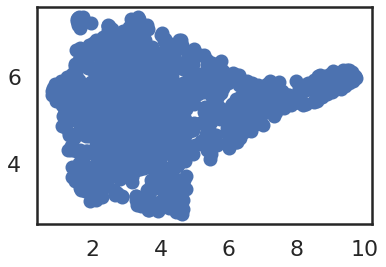

In [80]:
plt.scatter(x=lu[:,0], y=lu[:,1])

In [81]:
%%time
su = fit.fit_transform(short_latents.cpu().detach().numpy()) 

CPU times: user 1min 37s, sys: 1.24 s, total: 1min 39s
Wall time: 5.01 s


In [82]:
su.shape

(1000, 2)

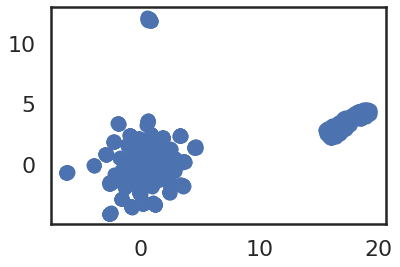

In [83]:
plt.scatter(x=su[:,0], y=su[:,1])